# Quiz 2

**Name:** Andrick Mercado

**Score:**

Using the Forward Euler Method, and notebook provided in lecture, find an approximate solution for $t\in(0,2)$ for the differential equation

$$\frac{dP}{dt}=P(1-P),$$

with initial condition $P(0)=0.5$. This differential equation is known to have the exact solution of

$$P(t)=\frac{1}{1+e^{-t}}.$$

* Your approximation should use a $\Delta t$ of 0.01 and a $t_f$ of 2.
* You should plot your approximation **and** the known solution on the same plot.
 * Make sure to label everything.
* Finally, plot the absolute error
$$\varepsilon=|\text{Approx.}-\text{Theoretical}|$$

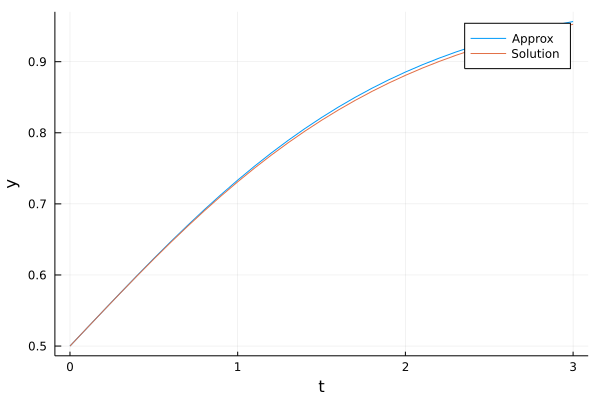

In [16]:
using Plots
function solution(t)
    return 1/(1+exp(-t))
end
function derivative(t, y)
    return y*(1-y)
end
function forwardEuler(y, dt, slope)
    return y+dt*slope
end
function helper(t0, dt, tf, y0)
    solution = [y0]
    counter = 1
    for t in (t0+dt):dt:tf
        slope = derivative(t, solution[counter])
        push!(solution, forwardEuler(solution[counter], dt, slope))
        counter += 1
    end
    return solution
end
t0 = 0.0
tf = 3.0
dt = 0.1
y0 = .5
T = t0:dt:tf
approximation = helper(t0, dt, tf, y0)
plot(T, approximation, label="Approx")
plot!(T, solution.(T), xlabel="t", ylabel="y", label="Solution")

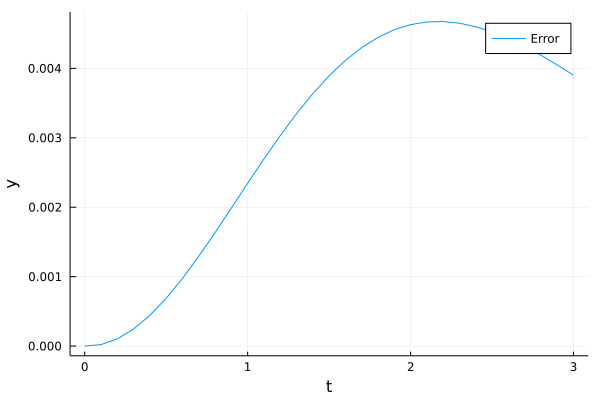

In [14]:
sol = solution.(T)
error = approximation - sol
error = abs.(error)
plot(T, error, xlabel="t", ylabel="y", label="Error")